**Clustering Mnist :** David Elorza Gabilondo -> 23/09/2023

**Descripción:**  Se trata de una práctica en la que se debe hacer clustering con el conjunto de datos Mnist. Contiene dos conjuntos: train y test. En este caso, como tanto el train como test tienen etiquetas, no hace falta el test ya que tenemos suficientes instancias, más que para probar a meter una nuevas instancia a ver si puede predecirla. Aunque de todos modos vamos a utilizar un algoritmo no supervisado para conseguir sacar la práctica adelante.


**Importar los datos**
Vamos a usar la libreria de pandas para importar los datos del csv y convertirlos en un data frame con el que podamos trabajar.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# the dataset have already been split into train, test set
test_set = "mnist_test.csv"
train_set = "mnist_train.csv"

In [2]:
# dump the train dataset into pandas dataframe for easy manipulation
# and plotting (don't touch the test set until when you are finally going to
# test in on the final model)
X_train = pd.read_csv(train_set)
X_test = pd.read_csv(test_set)
print(X_train.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [3]:
# to check out what we are going to be working with
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


Separar:
* X: input features
* y: clase real

In [4]:
# re-arrange:  y:class and x:features from train dataset
y_train = X_train['label'].copy()
X_train.drop('label', axis=1, inplace=True)

# re-arrange:  y:class and x:features from test dataset
y_test = X_test['label'].copy()
X_test.drop('label', axis=1, inplace=True)


**GRAFICAR Y UTILIZAR LOS CONJUNTOS PARA DESCRIPCIÓN INCIAL**

* Vamos a utilizar un barplot para poder contar con facilidad el número de instancias de cada conjunto de datos y poder aclarar inicialmente si la distribución de clases es medianamente homogénea o no, es decir, si por cada clase hay un número parecido de instancias.

In [5]:
# for visualization
import seaborn as sns
from matplotlib import pyplot as plt

Graficar el conjunto de datos test

Text(0.5, 1.0, 'Barplot del conjunto test')

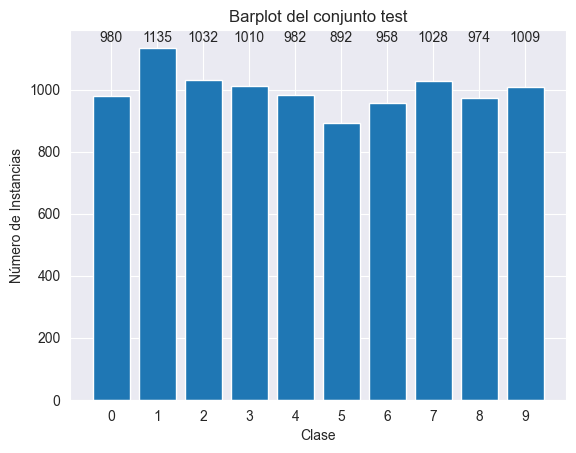

In [6]:
# num samples per class
value_counts = y_test.value_counts()

# Ordenar los valores y etiquetas por valor descendente
sorted_counts = value_counts.sort_index(ascending=True)
sorted_labels = sorted_counts.index

max_count = sorted_counts.max()  # Recuento máximo

# Crear el gráfico de barras
plt.bar(sorted_labels, sorted_counts)

# Establecer una altura fija para todas las etiquetas de texto
label_height = max_count + 10  # Puedes ajustar este valor según tus preferencias

# Agregar etiquetas de texto con el recuento en la altura fija
for index, value in enumerate(sorted_counts):
    plt.text(index, label_height, str(value), ha='center', va='bottom')

# Ajustar el eje x para mostrar cada valor individualmente
plt.xticks(range(len(sorted_labels)), sorted_labels)

# Agregar etiquetas en los ejes
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')

# Añadir título
plt.title('Barplot del conjunto test')

Graficar el conjunto de datos train:


Text(0.5, 1.0, 'Barplot del conjunto train')

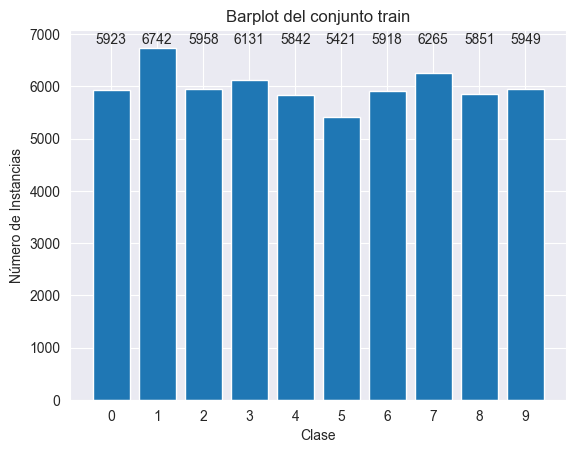

In [7]:
# num samples per class
value_counts = y_train.value_counts()

# Ordenar los valores y etiquetas por valor descendente
sorted_counts = value_counts.sort_index(ascending=True)
sorted_labels = sorted_counts.index

max_count = sorted_counts.max()  # Recuento máximo

# Crear el gráfico de barras
plt.bar(sorted_labels, sorted_counts)

# Establecer una altura fija para todas las etiquetas de texto
label_height = max_count + 10  # Puedes ajustar este valor según tus preferencias

# Agregar etiquetas de texto con el recuento en la altura fija
for index, value in enumerate(sorted_counts):
    plt.text(index, label_height, str(value), ha='center', va='bottom')

# Ajustar el eje x para mostrar cada valor individualmente
plt.xticks(range(len(sorted_labels)), sorted_labels)

# Agregar etiquetas en los ejes
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')

# Añadir título
plt.title('Barplot del conjunto train')

In [8]:
# you can change the random_image value to visualize any other image

def visualize(i):
    some_digit = X_train.iloc[i] # select any number, change to select any number
    plt.imshow(some_digit.values.reshape(28, 28))
    print('label', y_train.iloc[i])

label 0


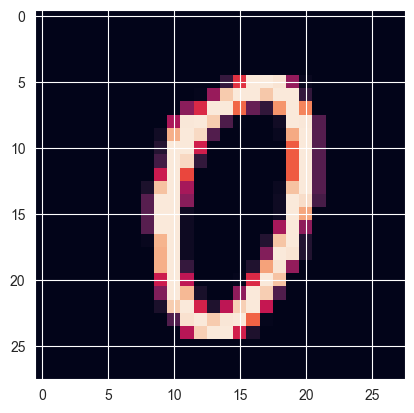

In [9]:
visualize(1000)

****Algoritmo(s) Clustering****
* En este caso se va a ejecutar T-SNE+Kmeans ya que es la que sin duda ha dado mejores resultados (la razón esta en el informe). No obstante, Se ha seleccionado para el cuaderno la opción con 21 clusters, ya que es la que maximiza la tasa de error a pesar de que la versión con 10 clusters maximiza la puntuación de silueta y Calinski-Harabasz.

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_train_TSNE = tsne.fit_transform(X_train)

In [11]:
from sklearn.cluster import KMeans
# Aplicar KMeans al conjunto reducido
n_clusters = 21
kmeans = KMeans(n_clusters=n_clusters, n_init=21)
kmeans.fit(X_train_TSNE)
kmeansLabels = kmeans.predict(X_train_TSNE)

En el caso de que queramos ver como queda la reducción de dimensionalidad con PCA:


In [12]:
from sklearn.decomposition import PCA

print('Dim originally: ',X_train.shape)
# Reducir las dimensiones para visualizarlas: PCA
pca = PCA(n_components=2)
pca.fit(X_train)
# Cambio de base a dos dimensiones PCA
X_train_PCAspace = pca.transform(X_train)
print('Dim after PCA: ',X_train_PCAspace.shape)

Dim originally:  (60000, 784)
Dim after PCA:  (60000, 2)


**Presentar como queda la distribución de lo predecido vs la etiqueta real**
* Hay que tener en cuenta que en este momento la etiqueta predecida puede no representar la real, el hecho es que los clusters son homogéneos y lo que los representa son su contenido, es decir la clase de las instancias que el cluster contiene.
* Se va a usar un heatmap como confusion matrix y plot en el que se dibujen los primeros 300 puntos en el espacio.

*En primer lugar, la reresentación de puntos en el espacio: si lo queremos hacer con PCA o con T-SNE:*
* 1) PCA:

Text(0.5, 1.0, 'Clustering en el espacio de PCA')

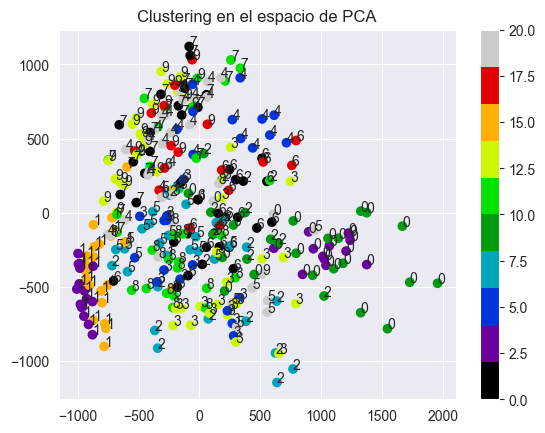

In [13]:
# Dibujar sólo unas pocas instancias
samples = 300
# Dibujar los puntos en el espacio, color: cluster, etiqueta-numérica: clase
# Color del punto: cluster
sc = plt.scatter(X_train_PCAspace[:samples, 0], X_train_PCAspace[:samples, 1],
                 cmap=plt.get_cmap('nipy_spectral', 10), c=kmeansLabels[:samples])
plt.colorbar()
# Etiqueta numérica: clase
for i in range(samples):
    plt.text(X_train_PCAspace[i, 0], X_train_PCAspace[i, 1], y_train[i])
plt.title('Clustering en el espacio de PCA')

Poco representativo este plot, mucha solapación entre clusters
* T-SNE

Text(0.5, 1.0, 'Clustering en espacio t-SNE')

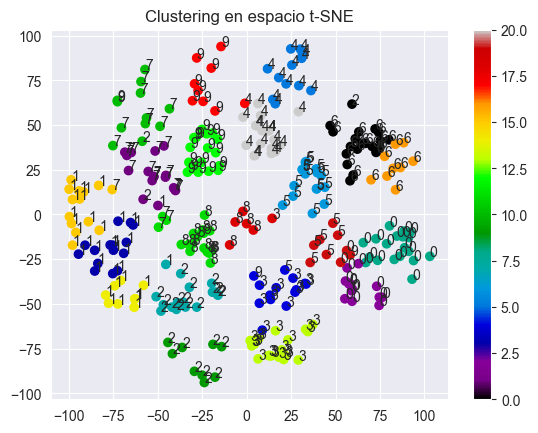

In [14]:
# Dibujar sólo unas pocas instancias (las primeras 300)
plt.scatter(X_train_TSNE[:300, 0], X_train_TSNE[:300, 1], c=kmeansLabels[:300], cmap='nipy_spectral')
plt.colorbar()
# # Dibujar los puntos en el espacio, color: cluster, etiqueta-numérica: clase
# Color del punto: cluster
for i in range(samples):
    plt.text(X_train_TSNE[i,0],X_train_TSNE[i,1], y_train[i])
plt.title('Clustering en espacio t-SNE')

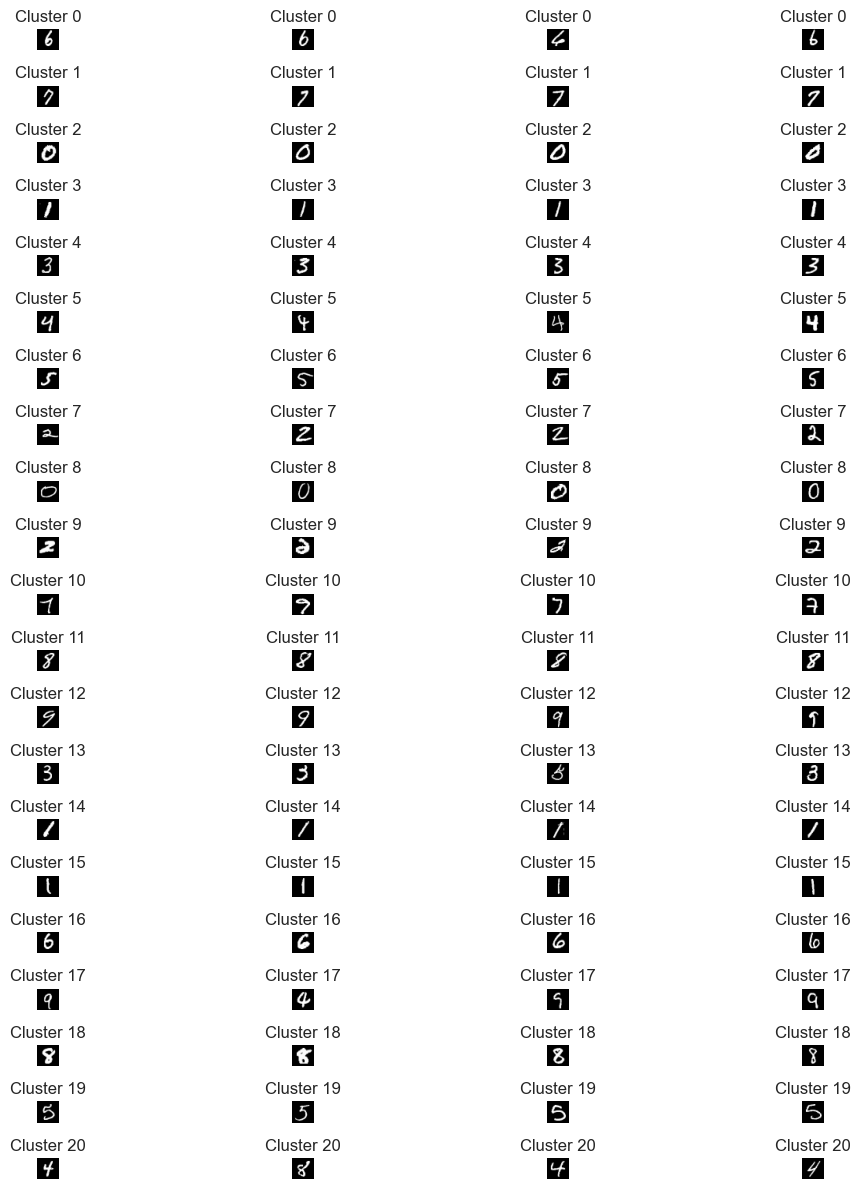

In [15]:
# TO.DO
# Visualizar, aleatoriamente, 4 imágenes de cada cluster
import random

# Create a DataFrame with cluster labels
df = pd.DataFrame({'Cluster': kmeansLabels})
df['Index'] = df.index

# Create a list to store selected indices for each cluster
selected_indices = []

# Randomly select 4 indices from each cluster
for cluster_id in range(n_clusters):
    cluster_indices = df[df['Cluster'] == cluster_id]['Index'].tolist()
    selected_indices.extend(random.sample(cluster_indices, 4))

# Plot the selected images
fig, axes = plt.subplots(n_clusters, 4, figsize=(12, 12))
for i, idx in enumerate(selected_indices):
    row = i // 4
    col = i % 4
    image = X_train.iloc[idx].values.reshape(28, 28)  # Assuming MNIST images are 28x28 pixels
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Cluster {kmeansLabels[idx]}')

plt.tight_layout()

Ahora vamos a representar la matriz de confusión:

Text(0.5, 1.0, 'Matriz de Confusión sin relabelización')

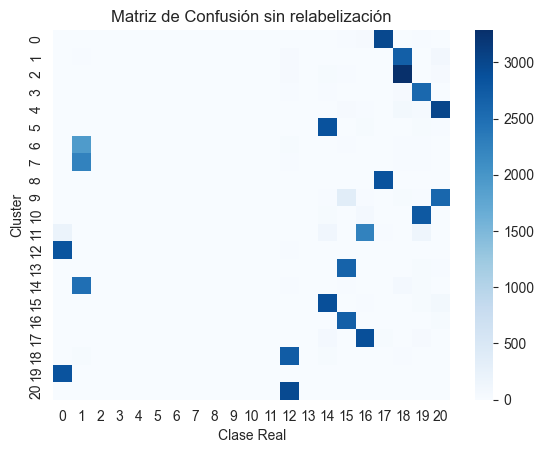

In [16]:
from sklearn.metrics import confusion_matrix

# Visualizar la matriz de confusión con el número de instancias
# El atributo generado por K-means es int, hay que pasarlos a string
to_string = lambda x : str(x)
# Obtener matriz de confusión Class to clustering eval
cm = confusion_matrix(np.vectorize(to_string)(kmeansLabels), np.vectorize(to_string)(y_train))
# Mapa de calor a partir de la matriz de confusion sin números
ax = sns.heatmap(cm, annot=False, cmap="Blues")
plt.xlabel('Clase Real')
plt.ylabel('Cluster')
plt.title('Matriz de Confusión sin relabelización')

**RENOMBRAR LABELS PARA CONSEGUIR MATRIZ DIAGONAL**

In [17]:
# To-Do
# Re-asingar labels para que la matriz de confusión cobre más sentido en la diagonal
# Reassign cluster labels based on the most common true labels within each cluster
cluster_to_class = {}
# Reasignar etiquetas de clúster basadas en las etiquetas verdaderas más comunes dentro de cada clúster
cluster_to_class = {}
for cluster_id in range(n_clusters):
    cluster_indices = np.where(kmeansLabels == cluster_id)[0]
    true_labels = y_train.iloc[cluster_indices].values
    most_common_label = np.bincount(true_labels).argmax()
    cluster_to_class[cluster_id] = most_common_label

# Mapear las etiquetas de clúster a etiquetas de clase
reassigned_labels = np.vectorize(cluster_to_class.get)(kmeansLabels)

Con esta porción lo que hemos hecho es que cada cluster tenga como nombre el número que mas lo representa, de esta forma vamos a conseguir la matriz diagonal, en el caso de que el clusterint haya sido de buena calidad, y vamos a poder medir el error calculando cuantas instancias están fuera de la matriz diagonal.

Text(0.5, 1.0, 'Matriz de confusión con las etiquetas ajustadas')

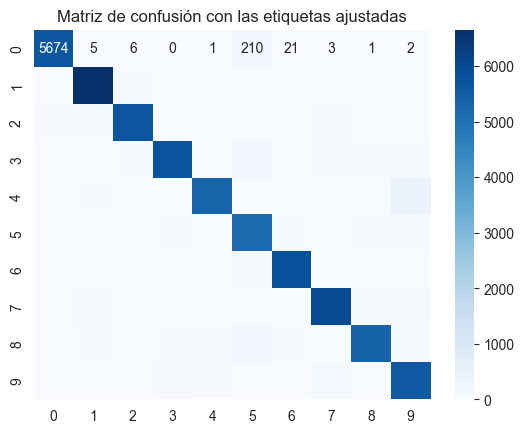

In [18]:
# Calculate the confusion matrix with the reassigned labels
cm = confusion_matrix(y_train, reassigned_labels)
total_correct = np.trace(cm)  # Suma de valores en la diagonal principal
total_samples = np.sum(cm)    # Suma de todos los valores en la matriz de confusión
# Create a heatmap
plt.xlabel('Clase Real')
plt.ylabel('Cluster')
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión con las etiquetas ajustadas")

Aunque esta matriz tiene buena pinta, es necesario evaluarlo de alguna manera. Por consiguiente, vamos a calcular métricas para evaluar que tan bueno es este modelo. Para ello, vamos a usar la tasa de error, la puntuación de silueta y la de Calinski-Harabasz (aunque existan más, estas son las más representativas para esta práctica):

In [19]:
# Calculate the confusion matrix with the reassigned labels
cm = confusion_matrix(y_train, reassigned_labels)
total_correct = np.trace(cm)  # Suma de valores en la diagonal principal
total_samples = np.sum(cm)    # Suma de todos los valores en la matriz de confusión

# Calcular el número total de clasificaciones incorrectas
total_incorrect = total_samples - total_correct

# Calcular la tasa de error
error_rate = total_incorrect / total_samples

print("Tasa de Error:", error_rate)

Tasa de Error: 0.05


In [20]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calcular la puntuación de silueta
silhouette_avg = silhouette_score(X_train_TSNE, reassigned_labels)
print("Puntuación de Silueta:", silhouette_avg)

Puntuación de Silueta: 0.402491


In [21]:
# Calcular la puntuación de Calinski-Harabasz
calinski_harabasz_avg = calinski_harabasz_score(X_train_TSNE, reassigned_labels)
print("Puntuación de Calinski-Harabasz:", calinski_harabasz_avg)

Puntuación de Calinski-Harabasz: 61024.7475356492








**EXTRAS**





En este caso el codo no es muy representativo pero en otros casos es bastante útil si queremos ver cúal es el número de clusters óptimo:

Text(0.5, 1.0, 'Método del Codo')

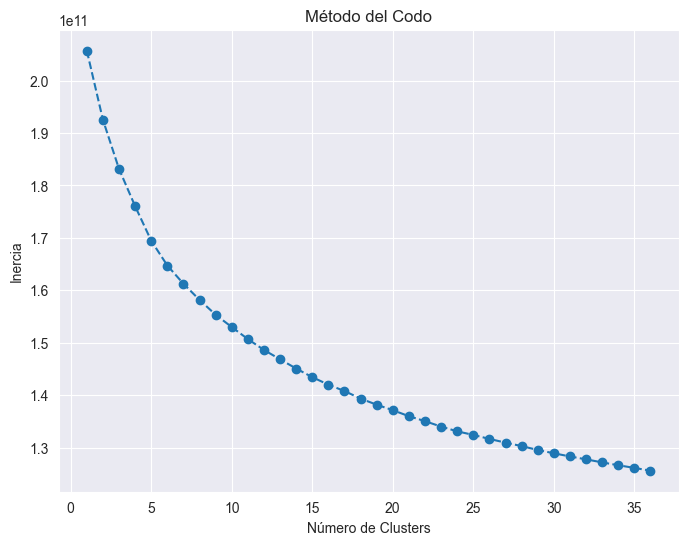

In [22]:
inertia = []
for n_clusters in range(1, 37):  # Prueba números de clusters de 1 a 36
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Graficar la inercia en función del número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 37), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

Por otra parte, para ver cúal es la dimensión que ofrece mejor calidad se puede graficar la proporción de varianza, para ver cúanta varianza se conserva al reducir la dimensión en PCA, también se puede hacer con T-SNE

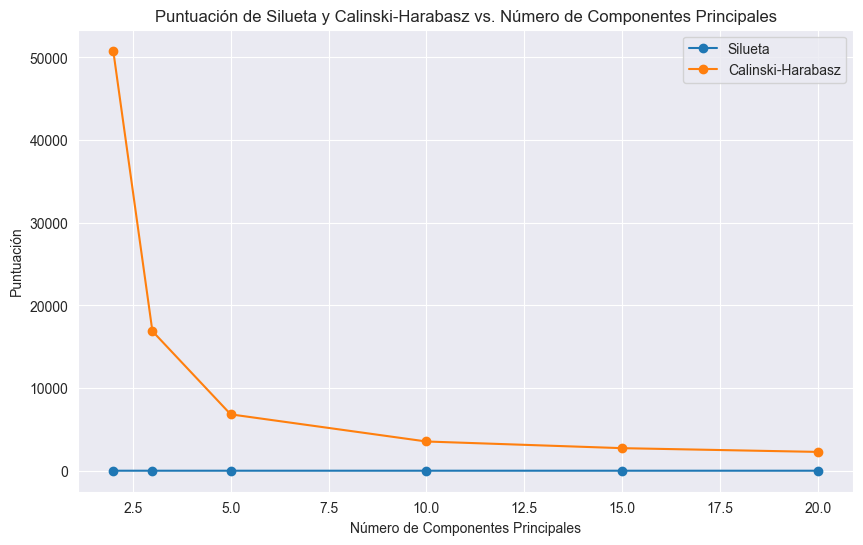

In [23]:
import matplotlib.pyplot as plt

n_components_list = [2, 3, 5, 10, 15, 20]
silhouette_scores = []
calinski_harabasz_scores = []

for n_components in n_components_list:
    # Realiza PCA con el número de componentes especificado
    pca = PCA(n_components=n_components)
    X_train_PCAspace = pca.fit_transform(X_train)

    # Realiza KMeans en el conjunto reducido
    n_clusters = 36  # Número de clusters para KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init=36)
    kmeans.fit(X_train_PCAspace)  # X_train_PCAspace es la representación PCA

    # Calcula las métricas de calidad
    silhouette_avg = silhouette_score(X_train_PCAspace, kmeans.labels_)
    calinski_harabasz_avg = calinski_harabasz_score(X_train_PCAspace, kmeans.labels_)

    # Almacena las métricas en las listas
    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, silhouette_scores, marker='o', label='Silueta')
plt.plot(n_components_list, calinski_harabasz_scores, marker='o', label='Calinski-Harabasz')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Puntuación')
plt.title('Puntuación de Silueta y Calinski-Harabasz vs. Número de Componentes Principales')
plt.legend()
plt.grid(True)

Además, tal vez en el futuro se use nuestro modelo para predecir otras imágenes. Por tanto, como la asigno a uno de los clusters previamente generados? Teniendo en cuenta que la imagen está previamente preprocesada

In [ ]:
nuevaImagen = tsne.fit_transform("datosProcesados/random_image1.csv")
cluster_label = kmeans.predict(nuevaImagen)
print(cluster_label)